# 1. Conceptual Questions (7 Points)

*Answer these in Markdown*

1. [1 point] What is the difference between a probability mass function and a probability density function?
2. [1 point] What is the difference between a cumulative distribution function and a prediction interval?
3. [1 point] Is the exponential distribution a continuous or discrete distribution? Is it valid to compute the probability of a single element in the sample space?
4. [2 points] What is the probability of $t > 8$ in an exponential distribution with $\lambda = \frac{1}{4}$? Leave your answer as an unevaluated exponential. 
5. [1 point] This slice must have how many elements: `a[5:2]`? How can you tell without counting?

### 1.1
PMF is for discrete sample space, PDF is for continuous

### 1.2
CDF is probability of an interval, prediction interval is interval given a probability

### 1.3
Continuous, no

### 1.4
$$
\int_8^{\infty} e^{-t / 4} \, dt = \left. -e^{-t / 4}\right]_4^{\infty} = 0 - - e^{-2} = e^{-2}
$$

### 1.5
$3$, because $5 - 2$

# 2. Car Stopping Distance (10 Points)

1. [4 points] Load the cars dataset and create a scatter plot. It contains measurements a cars' stopping distance in feet as a function of speed in mph. If you get an error when loading `pydataset` that says `No Module named 'pydataset'`, then execute this code in a new cell once: `!pip install --user pydataset`

2. [4 points] Compute the sample correlation coefficient between stopping distance and speed in python and report your answer by writing a complete sentence in Markdown.

2. [2 points] Why might there be multiple stopping distances for a single speed?

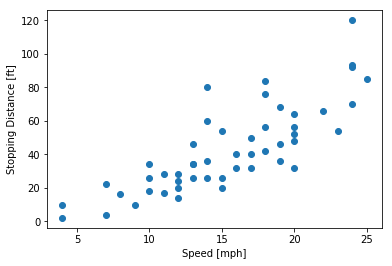

In [22]:
#2.1
import pydataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cars = pydataset.data('cars').values
plt.plot(cars[:,0], cars[:,1], 'o')
plt.xlabel('Speed [mph]')
plt.ylabel('Stopping Distance [ft]')
plt.show()

In [59]:
#1.2
np.corrcoef(cars[:,0].astype(float), cars[:,1].astype(float))

array([[ 1.       ,  0.8068949],
       [ 0.8068949,  1.       ]])

### 2.2
The correlation coefficient is 0.81.

### 2.3

Multiple cars were tested or one car was tested multiple times or both.

# 3. Housing Prices (24 Points)

1. [8 points] Load the 'House' dataset and use `pydataset.data('Housing', show_doc=True)` to see information about the dataset. Use the snippet below to format your ticks with dollar signs and commas for thousands. Note that this data is from the 1970s. Assess the correlation between lotsize and price. Use plots and sample correlation coefficient as evidence to support a written answer.

```python
import matplotllib.ticker
fmt = '${x:,.0f}'
tick = matplotllib.ticker.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick) 
```

2. [8 points] Use a violin plot to show if being in a preferred neighborhood affects price. You may use any other calculations (e.g., sample standard deviation) to support your conclusions. Write out your conclusion.

3. [8 points] Use a boxplot to determine if bedroom number affects price. What is your conclusion?

### 3.1

array([[ 1.        ,  0.53579567],
       [ 0.53579567,  1.        ]])

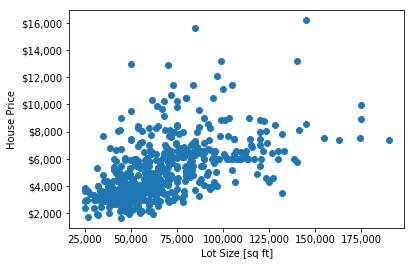

In [71]:
import matplotlib.ticker
fmt = '${x:,.0f}'
tick = matplotlib.ticker.StrMethodFormatter(fmt)

fmt = '{x:,.0f}'
xtick = matplotlib.ticker.StrMethodFormatter(fmt)

house = pydataset.data('Housing').values

plt.gca().yaxis.set_major_formatter(tick) 
plt.gca().xaxis.set_major_formatter(xtick) 
plt.plot(house[:, 0], house[:,1], 'o')
plt.ylabel('House Price')
plt.xlabel('Lot Size [sq ft]')
np.corrcoef(house[:,0].astype(np.float), house[:,1].astype(np.float))

There is a weak correlation. The correlation coefficient is low at 0.53, but there is so much data that we can see a weak correlation especially at small lot sizes. 

### 3.2

In [60]:
import seaborn as sns
p = house[:,-1] == 'yes'

79750.0
58500.0


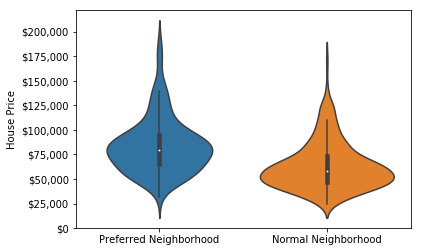

In [69]:
sns.violinplot(data=[house[p,0], house[~p,0]])
plt.gca().yaxis.set_major_formatter(tick)
print(np.median(house[p,0]))
print(np.median(house[~p,0]))
plt.xticks(range(2), ['Preferred Neighborhood', 'Normal Neighborhood'])
plt.ylabel('House Price')
plt.show()

The preferred neighborhood has a \$20,000 higher median price and has a longer tail at high prices, indicating many expensive homes. 

### 3.3

In [51]:
labels = np.unique(house[:,2])
ldata = []
#slice out each set of rows that matches label
#and add to list
for l in labels:
    ldata.append(house[house[:,2] == l, 0].astype(float))

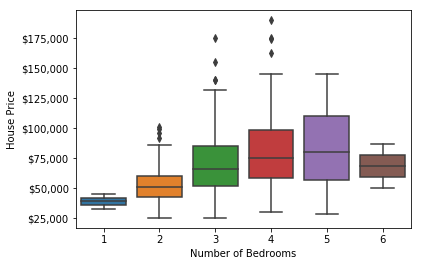

In [68]:
sns.boxplot(data=ldata)
plt.xticks(range(len(labels)), labels)
plt.xlabel('Number of Bedrooms')
plt.gca().yaxis.set_major_formatter(tick)
plt.ylabel('House Price')
plt.show()

The number of bedrooms is important up until 4, after which it seems to have less effect. Having 1 bedroom has a very narrow distribution. There appears to be a correlation overall with bedroom number. 